In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# load csv
df = pd.read_csv('data\gda_metrics.csv')

In [21]:
df.head()

,brand_ad_name,keywords,time_period_of_the_game,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,tweet_count
0,"Bud Light: Easy To Drink, Easy To Enjoy",cellysweepstakes,Quarter 3,2.907191e+06,22639.0,15686.0,3592.0,1567432.0,39851
1,Limit Break,digidaigaku,Quarter 1,1.382400e+09,366.0,3229.0,72.0,338531.0,39724
2,Disney 100 Special Look,disney,Quarter 4,6.082562e+07,8434.0,104131.0,2203.0,14616930.0,39660
3,T-Mobile The Re-write,winning,Quarter 3,1.878849e+07,16049.0,213598.0,3124.0,18646031.0,39347
4,Disney 100 Special Look,young,Quarter 3,3.035778e+07,13476.0,138078.0,2276.0,12453101.0,39213


In [22]:
df['public_metrics.retweet_count'].sum()


4943655230.0

In [23]:
sums = df.groupby('time_period_of_the_game')['tweet_count'].sum()

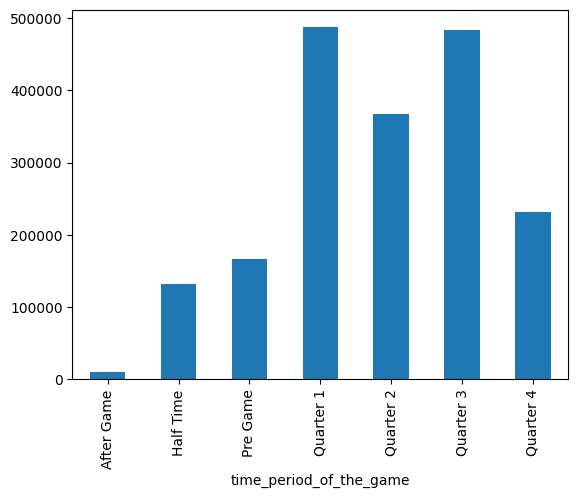

In [24]:
sums.plot(kind='bar')
plt.show()

In [25]:
df['engagement'] = df[['public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count']].sum(axis=1)

df_sorted = df.groupby('brand_ad_name')['engagement'].sum()
df_sorted = pd.DataFrame(df_sorted).reset_index()
df_sorted = df_sorted.sort_values(by='engagement', ascending=False)

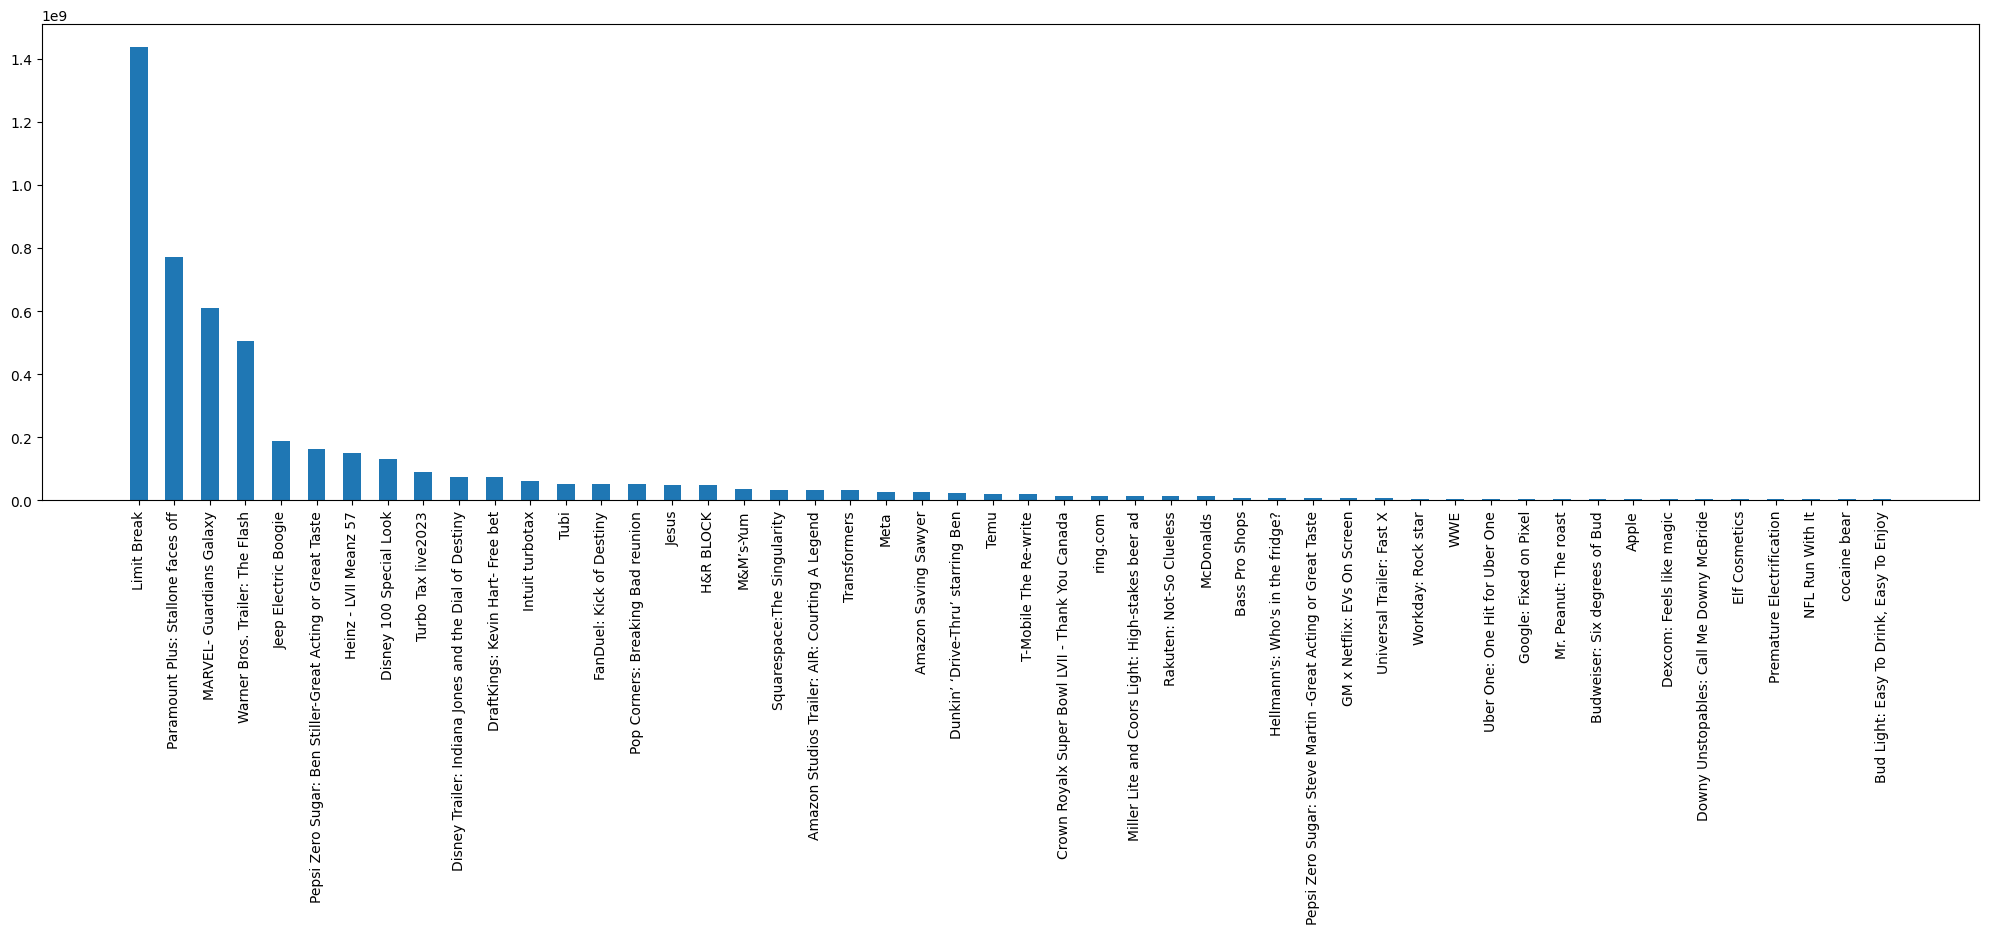

In [26]:
top_engagements = df_sorted[:50]

plt.figure(figsize=(25, 7))
plt.bar(top_engagements['brand_ad_name'], top_engagements['engagement'], width=0.5)

plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)

plt.show()

In [27]:
df_engagement_brand = df_sorted[['brand_ad_name', 'engagement']]
df_engagement_brand.to_csv('export/gdac_engagement.csv', index=False)